# 粒子群算法

## 写在前面

粒子群优化算法(Particle swarm optimization, PSO) 是一种进化计算技术（evolutionary computation）。该算法源于对鸟群捕食的行为研究。粒子群优化算法的基本思想：是通过群体中个体之间的协作和信息共享来寻找最优解。

鸟被抽象为没有质量和体积的微粒(点)，并延伸到N维空间，粒子i在N维空间的位置表示为矢量Xi＝(x1，x2，…，xN)，飞行速度表示为矢量Vi＝(v1，v2，…，vN)。

每个粒子都可以看作问题的一个潜在最优解，用位置、速度和适应度值这三项指标来表征一个粒子。每个粒子都有一个由目标函数决定的适应值(fitness value)，并且知道自己到目前为止发现的最好位置(pBestPos)和现在的位置Xi。这个可以看作是粒子自己的飞行经验。除此之外，每个粒子还知道到目前为止整个群体中所有粒子发现的最好位置(gBestPos)(gBestPos是pBestPos中的最好值)，这个可以看作是粒子同伴的经验。粒子就是通过自己的经验和同伴中最好的经验来决定下一步的运动。 

标准PSO算法的流程：

     1）初始化一群粒子(群体规模为N)，包括随机位置和速度；
     2）评价每个粒子的适应度；
     3）对每个粒子，将其适应值与其经过的最好位置pBestPos作比较，如果较好，则将其作为当前的最好位置pBestPos；
     4）对每个粒子，将其适应值与其经过的最好位置gBestPos作比较，如果较好，则将其作为当前的最好位置gBestPos；
     5）根据公式(2)、(3)调整粒子速度和位置；
     6）未达到结束条件则转第2）步。

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 2.案例分析

### 2.1 函数极值问题

寻找下列非线性函数在[-2, 2]区间内的极大值
$$
f(x,y) = \frac{(sin(\sqrt{(x^2+y^2)})}{\sqrt{(x^2+y^2)}}+e^{\frac{cos2\pi x+ cos 2\pi y}{2}}-2.71289
$$

In [ ]:
x = np.arange(-2,2,0.1)
y = np.arange(-2,2,0.1)
X, Y = np.meshgrid(x,y)

Z = np.sin(np.sqrt(X**2+Y**2))/np.sqrt(X**2+Y**2)+np.exp((np.cos(2*np.pi*X)+np.cos(2*np.pi*Y))/2)-2.71289

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(-2, 1)
ax.set_xticks(ticks=[-2,-1,0,1,2])
ax.set_yticks(ticks=[-2,-1,0,1,2])
plt.show()

### 2.1.1 参数设置

In [ ]:
# 惯性权重：w
w0 = 0.9

# 学习因子或加速因子：lr
lr = (0.49445,1.49445)

# 最大迭代次数：maxgen
maxgen = 300

# 种群规模：n 
n = 50

# 粒子的位置和速度的最大最小值：rangePos, rangeV
rangePos = (-2*math.pi , 2*math.pi)
rangeV = (-0.5,0.5)

### 2.1.2 种群初始化

In [ ]:
# 适应度函数
def func(x):
    # x输入粒子位置
    # y 粒子适应度值
    if (x[0]==0)&(x[1]==0):
        y = np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
    else:
        y = np.sin(np.sqrt(x[0]**2+x[1]**2))/np.sqrt(x[0]**2+x[1]**2)+np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
    return y

In [ ]:
pos = np.zeros((n,2))
v = np.zeros((n,2))
fitness = np.zeros(n)

for i in range(n):
    pos[i] = [(np.random.rand()-0.5)*rangePos[0]*2,(np.random.rand()-0.5)*rangePos[1]*2]
    v[i] = [(np.random.rand()-0.5)*rangePos[0]*2,(np.random.rand()-0.5)*rangePos[1]*2]
    fitness[i] = func(pos[i])

### 2.1.3 寻找初始极值

In [ ]:
# 群体最优的粒子位置及其适应度值
gBestPos, gBestFitness = pos[fitness.argmax()].copy(), fitness.max()
# 粒子的最优位置及其适应度值
pBestPos, pBestFitness = pos.copy(), fitness.copy()

### 2.1.4 迭代寻优

In [ ]:
result = np.zeros(maxgen)

In [ ]:
for i in range(maxgen):
#     w = w0 # 恒定惯性权重
#     w = w0 - 0.4*i/maxgen  #线性递减惯性权重
    w = w0 - 0.4*(i/maxgen)**2 #递减惯性权重
#     w = w0 - 0.4*(2*i/maxgen - (i/maxgen)**2) #递减惯性权重

    #速度更新
    for j in range(n):
        v[j] = w*v[j] + lr[0]*np.random.rand()*(pBestPos[j]-pos[j])+lr[1]*np.random.rand()*(gBestPos-pos[j])
    v[v<rangeV[0]] = rangeV[0]
    v[v>rangeV[1]] = rangeV[1]

    #粒子位置更新
    for j in range(n):
        pos[j] += v[j]
    pos[pos<rangePos[0]] = rangePos[0]
    pos[pos>rangePos[1]] = rangePos[1]

    #适应度更新
    for j in range(n):
        fitness[j] = func(pos[j])

    for j in range(n):
        if fitness[j] > pBestFitness[j]:
            pBestFitness[j] = fitness[j]
            pBestPos[j] = pos[j].copy()

    if pBestFitness.max() > gBestFitness:
        gBestFitness = pBestFitness.max()
        gBestPos = pos[pBestFitness.argmax()].copy()

    result[i] = gBestFitness

In [ ]:
plt.plot(result[:300])
plt.show()

In [ ]:
plt.scatter(pos[:,0],pos[:,1])

In [ ]:
print('目标函数在{0}取到极大值：{1:.4f}'.format(gBestPos, gBestFitness))

## 2.2 多目标优化问题

假设存在5类物品，每类物品中又包含4种具体物品，现要求从这5类物品分别选出1种物品放入背包种，使得背包种物品的总价值最大，体积最小，并且背包的总质量不超过92kg。

背包问题的数学模型为：
$$
\mathrm{max} P_x = \sum_{j=1}^5 P_{X_{j},j}
$$
$$
\mathrm{max} V_x = \sum_{j=1}^5 V_{X_{j},j}
$$
$$
s.t. \sum_{j=1}^5  M_{X_{j},j}\leq 92
$$

### 2.2.1 参数设置

In [25]:
P = pd.read_csv('price.csv', header=None)   # 各物品的价值
M = pd.read_csv('mass.csv', header=None)    # 各物品的质量
V = pd.read_csv('volume.csv', header=None)  # 各物品的体积
weight = 92

xSize = 50      # 种群规模
Dim = 5         # 特征维数
maxgen = 300    # 迭代次数
c1 = 0.8        # 学习因子
c2 = 0.8
wmax = 1.2      # 惯性因子
wmin = 0.1


### 2.2.2 种群初始化

In [26]:
np.random.seed(1024)
X = np.random.randint(0, 4, [xSize, Dim])           # 粒子群初始化
velocity = np.zeros((xSize, Dim))                   # 速度初始化

# 粒子适应度值
fitness = np.zeros((xSize, 3)) # 粒子价值目标p、体积目标v、质量约束m

# 个体最优值和群体最优位置
xBest = X
gBest = X[1,:]

### 2.2.3 寻找初始极值

In [27]:
for i in range(xSize):
    for j in range(Dim):
        fitness[i, 0] += P.iloc[X[i,j],j] # 价值适应度值
        fitness[i, 1] += V.iloc[X[i,j],j] # 体积适应度值
        fitness[i, 2] += M.iloc[X[i,j],j] # 质量约束

In [28]:
particleBest = np.copy(fitness)   # 粒子个体最优位置

# 筛选非劣解
solution = []
position = []
tol = 1e-7
for i in range(xSize):
    flag = 0    # 支配标志
    for j in range(xSize):
        if j != i:
            if ((fitness[i,0] < fitness[j,0]) & (fitness[i,1] > fitness[j,1])) | ((fitness[i,0] < fitness[j,0]) & (abs(fitness[i,1] - fitness[j,1]) < tol)) | ((abs(fitness[i,0] - fitness[j,0]) < tol) & (fitness[i,1] > fitness[j,1])) | (fitness[i,2] >weight):
                flag = 1
                break
    if flag == 0:
        position.append( X[i,:] ) # 记录非劣解位置
        solution.append(fitness[i,:])# 记录非劣解
bag, noninferior = np.array(position), np.array(solution)


### 2.2.4 循环迭代

In [29]:
for k in range(maxgen):
    # 惯性因子更新
    w = wmax - (wmax -wmin) * (k / maxgen)

    #  从非劣解集合中随机选择一个作为群体最优解
    index = np.random.randint(len(noninferior))
    gBest = bag[index]

    for i in range(xSize):
        velocity[i,:] = w * velocity[i,:] + c1 * np.random.random() * (xBest[i,:] - X[i,:]) + c2 * np.random.random() *(gBest-X[i,:])
        X[i,:] = X[i,:] + velocity[i, :]
    X = X % 4 
  
    # 计算个体适应度
    fitnesstmp = np.zeros((xSize, 3))

    for i in range(xSize):
        for j in range(Dim):
            fitnesstmp[i, 0] += P.iloc[X[i,j],j] # 价值适应度值
            fitnesstmp[i, 1] += V.iloc[X[i,j],j] # 体积适应度值
            fitnesstmp[i, 2] += M.iloc[X[i,j],j] # 质量约束
        
        # 若当前新粒子支配原有粒子，则更新
        if ((fitness[i,0] < fitnesstmp[i,0]) & (fitness[i,1] > fitnesstmp[i,1])) |\
        ((fitness[i,0] < fitnesstmp[i,0]) & (abs(fitness[i,1] - fitnesstmp[i,1]) < tol)) | \
        ((abs(fitness[i,0] - fitnesstmp[i,0]) < tol) & (fitness[i,1] > fitnesstmp[i,1])) | (fitness[i,2] >weight):
             xBest[i] =  X[i] # 粒子个体最优位置
             particleBest[i] = fitnesstmp[i]   
        
    # 将原非劣解集合与粒子个体最优合并
    collectionSet = np.vstack((noninferior, particleBest))
    xx = np.vstack((bag, xBest))
    
    fitness = fitnesstmp

    # 筛选非劣解
    solution = []
    position = []
    for i in range(len(xx)):
        flag = 0    # 支配标志
        for j in range(len(xx)):
            if j != i:
                if ((collectionSet[i,0] < collectionSet[j,0]) & (collectionSet[i,1] > collectionSet[j,1])) | \
        ((collectionSet[i,0] < collectionSet[j,0]) & (abs(collectionSet[i,1] - collectionSet[j,1]) < tol)) | \
        ((abs(collectionSet[i,0] - collectionSet[j,0]) < tol) & (collectionSet[i,1] > collectionSet[j,1])) | \
        (collectionSet[i,2] >weight):
                    flag = 1
                    break
        if flag == 0:
            position.append( xx[i,:] ) # 记录非劣解位置
            solution.append(collectionSet[i,:])# 记录非劣解
    # 除去重复项
    bag, indices = np.unique(np.array(position),axis=0, return_index=True)
    noninferior = np.array(solution)
    noninferior = noninferior[indices]
    
    

Text(0,0.5,'V(volume)')

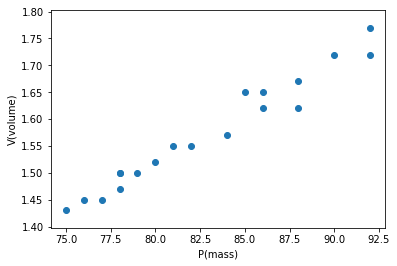

In [35]:
plt.scatter(noninferior[:,2], noninferior[:,1])
plt.xlabel('P(mass)')
plt.ylabel('V(volume)')

根据上图可知，粒子群算法的搜索得到的非劣解构成了pareto面，算法取得了很好的结果。

In [37]:
np.hstack((noninferior, bag))

array([[28.  ,  1.45, 77.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [30.  ,  1.5 , 79.  ,  0.  ,  0.  ,  0.  ,  2.  ,  0.  ],
       [27.  ,  1.43, 75.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [35.  ,  1.65, 85.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [32.  ,  1.55, 81.  ,  0.  ,  1.  ,  0.  ,  2.  ,  0.  ],
       [36.  ,  1.67, 88.  ,  0.  ,  2.  ,  0.  ,  0.  ,  0.  ],
       [33.  ,  1.57, 84.  ,  0.  ,  2.  ,  0.  ,  2.  ,  0.  ],
       [35.  ,  1.65, 86.  ,  0.  ,  2.  ,  1.  ,  0.  ,  0.  ],
       [32.  ,  1.55, 82.  ,  0.  ,  2.  ,  1.  ,  2.  ,  0.  ],
       [37.  ,  1.72, 92.  ,  0.  ,  2.  ,  3.  ,  0.  ,  0.  ],
       [34.  ,  1.62, 88.  ,  0.  ,  2.  ,  3.  ,  2.  ,  0.  ],
       [30.  ,  1.5 , 78.  ,  0.  ,  3.  ,  0.  ,  0.  ,  0.  ],
       [29.  ,  1.47, 78.  ,  0.  ,  3.  ,  0.  ,  1.  ,  0.  ],
       [31.  ,  1.52, 80.  ,  0.  ,  3.  ,  0.  ,  2.  ,  0.  ],
       [28.  ,  1.45, 76.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  ],
       [30.  ,  1.5 , 78.